# Simpsons Characters Recognition
## Prediction on Testdataset
- Reload model
- calculate accuracies
- create confusion matrix
- conclusion

In [29]:
#Import libaries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re

#Scikit-Learn und Models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from skimage import io

#Keras
import tensorflow as tf
from tensorflow import keras

#import custom functions
import simpsons_utils as su
import resnet34

### Settings and loading settings

In [2]:
#Settings
path = './'
test_path = './simpsons_testset/'

#Load dict with settings for image correction
with open('./settings_dict.json',) as file:
    settings_dict = json.load(file)

#Load list of characters
with open('./char_list_reduced.json',)  as file:
    character_list = json.load(file)

### Model Loading

In [3]:
model = resnet34.resnet34(settings_dict)

#compile model, needed before usage
model.compile(loss='sparse_categorical_crossentropy'
              , optimizer=keras.optimizers.Adam()
              , metrics=['accuracy'])

#Load model if exists
try:
    model.load_weights(f'{path}/simpsons_keras_model.h5')
except:
    print('Weights file does not exist')

### Predictions on Testset

In [4]:
#load images
image_list, true_labels = su.create_test_image_list(test_path)
images = su.load_transform_images(image_list, settings_dict)

In [90]:
prediction_probas = model.predict(images)
confidence = np.max(prediction_probas, axis=1)

In [22]:
#converting predictions into labels
labels = np.argmax(prediction_probas, axis=1)
labels = np.asarray(character_list)[labels]

In [28]:
#score on the testset
test_score = accuracy_score(true_labels, labels)
print(f"The score on the testset is: {100 * test_score:.2f}%")

The score on the testset is: 98.18%


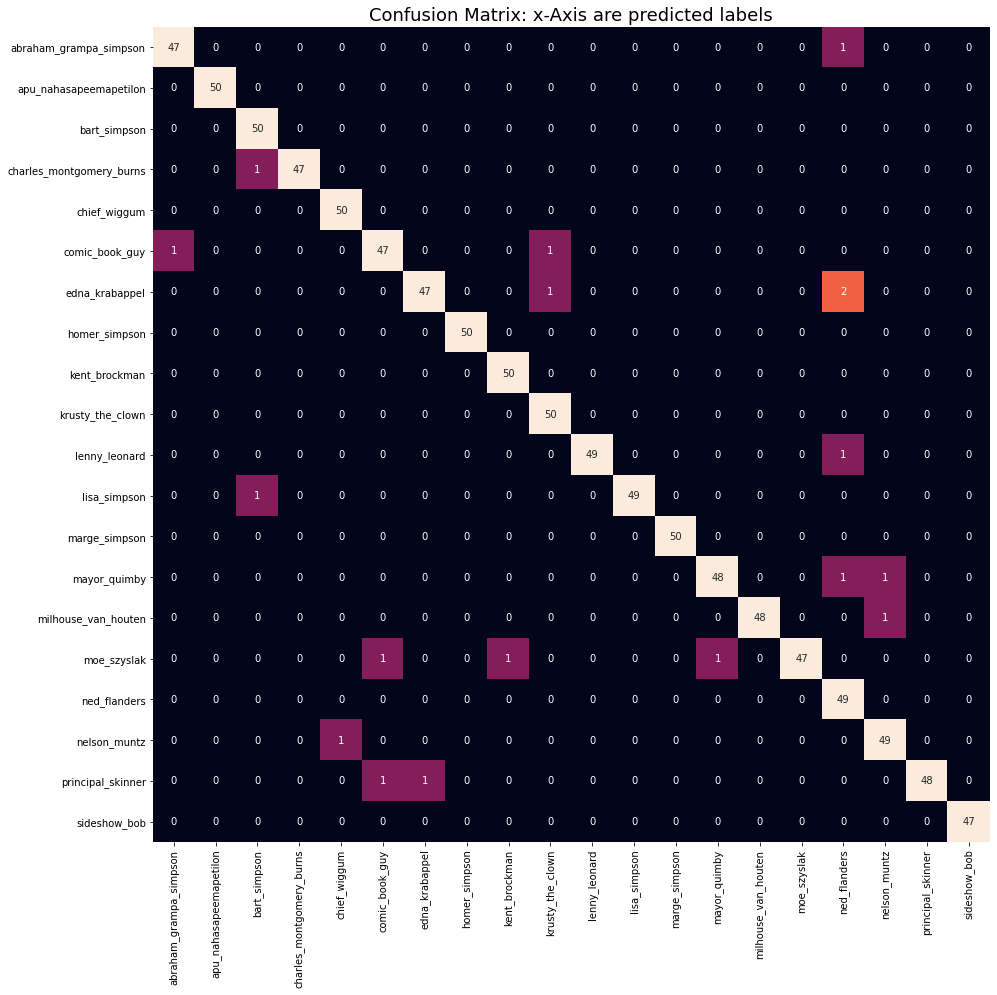

In [61]:
#Plot a confusion matrix of the images
con_mat = confusion_matrix(true_labels, labels)
plt.figure(figsize=(15, 15))
sns.heatmap(con_mat, #df
            annot=True, #show annotations
            vmin=0, #lower color value
            vmax=3, #upper color value
            cbar=False, #show colorbar
            xticklabels=character_list,
            yticklabels=character_list,
           )
plt.title('Confusion Matrix: x-Axis are predicted labels', size=18);

There are only 17 incorrect labeled images. Plot all these images

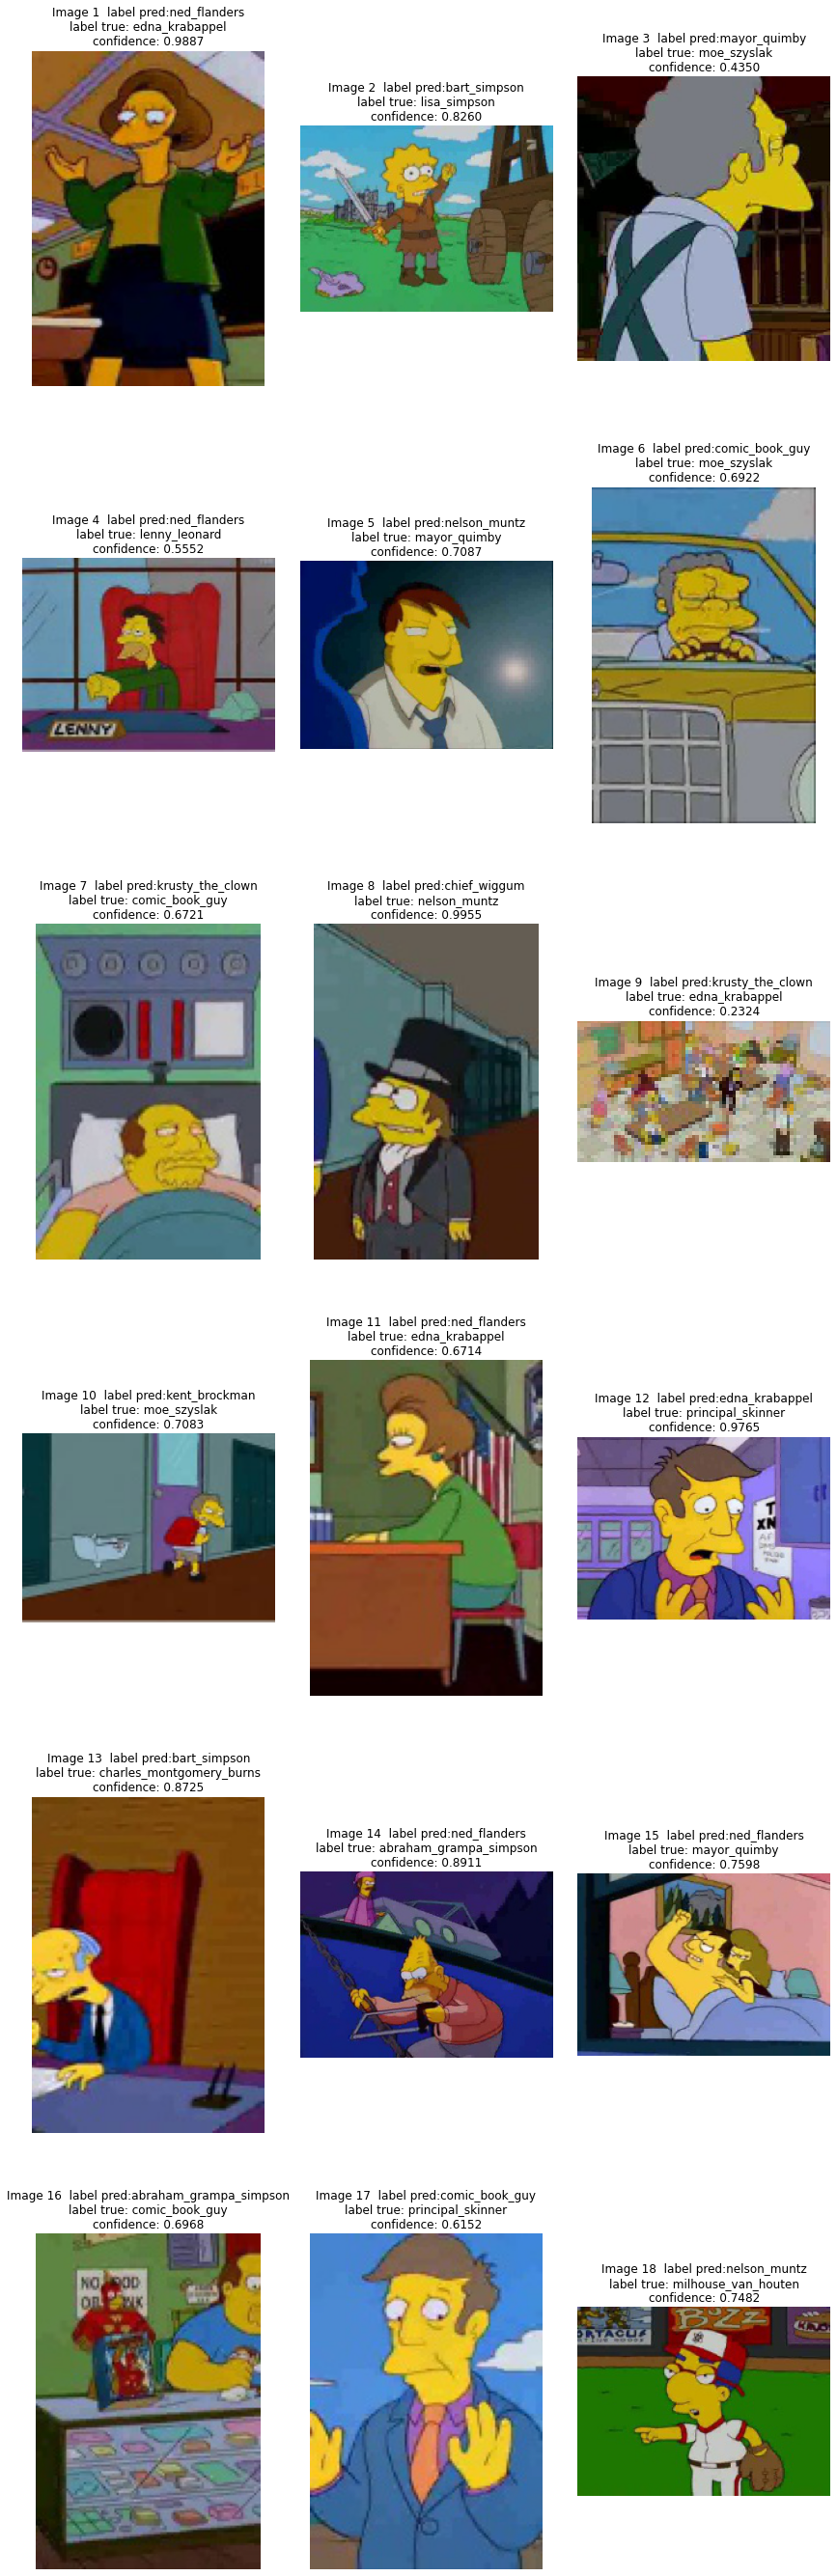

In [93]:
#find the incorrect labeled images
false_labels_pos = np.where(labels != true_labels)[0]
no_plot_rows = round(len(false_labels_pos) / 3)
plt.figure(1 , figsize = (15 , 48))
for i, label_pos in enumerate(false_labels_pos):
    plt.subplot(no_plot_rows, 3 , i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.1)
    plt.imshow(io.imread(image_list[label_pos]))
    plt.title(f'Image {i+1}  label pred:{labels[label_pos]}\nlabel true: {true_labels[label_pos]}\nconfidence: {confidence[label_pos]:.4f}')
    plt.axis('off')
plt.show()

- In image 1, one could argue that Edna Krabappel looks a bit like Ned Flanders
- Image 9 has a bad resolution for a good classification and the model is not sure about the classification either
- Interestingly the model is sure about images 1, 8, 12
- In image 14 one can see a part of Ned Flanders in the upper left, which may have caused the wrong label

### Conclusion
- The resnet34 structure has an accuracy of 98% wihtout any hyperparameter tuning
- Training on an Google Colab graphics cards is reasonably fast
- Next steps would include:
    - tweaking of the image quality
    - tests on different network structures
    - hyperparameter tuning eg. different optimizers and initalisatons of the network